In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import dc_stat_think as dcst

In [3]:
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [5]:
stroke.shape

(5110, 12)

In [4]:
stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
stroke.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [256]:
pd.crosstab(stroke.gender, stroke.stroke)

stroke,0,1
gender,,
Female,2853,141
Male,2007,108
Other,1,0


In [ ]:
features=['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status']
correlation_table = []
for cols in features:
    y = en_df["stroke"]
    x = en_df[cols]
    corr = np.corrcoef(x, y)[1][0]

In [249]:
np.corrcoef(stroke.age, stroke.stroke)

array([[1.        , 0.24525735],
       [0.24525735, 1.        ]])

In [175]:
stroke.stroke.value_counts(normalize=True)

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [174]:
stroke.groupby('gender').stroke.value_counts()

gender  stroke
Female  0         2853
        1          141
Male    0         2007
        1          108
Other   0            1
Name: stroke, dtype: int64

In [12]:
ge = stroke.groupby('gender')['bmi'].mean()
ge

gender
Female    29.065758
Male      28.647936
Other     22.400000
Name: bmi, dtype: float64

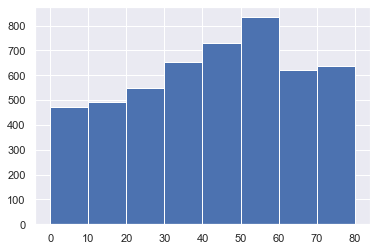

In [195]:
sns.set()
bin = [0,10,20,30,40,50,60,70,80]
_ = plt.hist(stroke.age, bins = bin)

In [190]:
np.mean(stroke.age), np.median(stroke.age)

(43.226614481409015, 45.0)

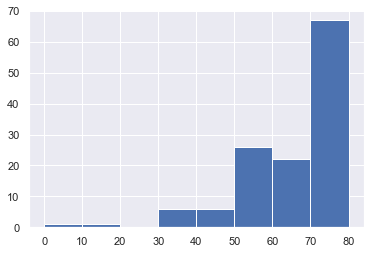

In [204]:
f = stroke[(stroke.gender == 'Female') & (stroke.stroke == 1)]
_ = plt.hist(f.age, bins=bin)

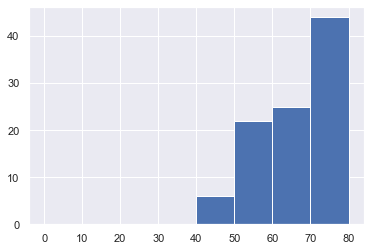

In [206]:
m = stroke[(stroke.gender == 'Male') & (stroke.stroke == 1)]
_ = plt.hist(m.age, bins=bin)

In [210]:
stroke_positive = stroke[stroke.stroke == 1]
stroke_positive['work_type'].value_counts()

Private          149
Self-employed     65
Govt_job          33
children           2
Name: work_type, dtype: int64

In [96]:
f_ge = ge['Female']
f_ge

29.065757680359038

In [108]:
m_ge = ge['Male']
m_ge

28.647936350074616

In [113]:
df = []

for i, row in stroke.iterrows():
    if (row.gender == 'Female') & (np.isnan(row.bmi)):
        row.fillna(f_ge, inplace=True)
    if (row.gender == 'Male') & (np.isnan(row.bmi)):
        row.fillna(f_ge, inplace=True)
    df.append(row)

In [124]:
stroke_1 = pd.DataFrame(df)
stroke_1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.065758,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [141]:
stroke_1[['ever_married', 'work_type', 'Residence_type', 'smoking_status']] = stroke_1[['ever_married', 'work_type', 'Residence_type', 'smoking_status']].apply(lambda x: x.astype('category'))

In [142]:
stroke_1.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,29.065758,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [146]:
stroke_1.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.002443,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.326283,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.160593,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.039328,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.169150,0.131945
bmi,0.002443,0.326283,0.160593,0.039328,0.169150,1.000000,0.039562
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.039562,1.000000


In [149]:
stroke_dummy = pd.get_dummies(stroke_1)
stroke_dummy.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,51676,61.0,0,0,202.21,29.065758,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [233]:
X = stroke_dummy.drop('stroke', axis=1).values
X = X[:, 1:]
y = stroke_dummy.stroke.values

In [247]:
scale = StandardScaler()
scale.fit(X)
X = scale.transform(X)

In [248]:
knn = KNeighborsClassifier(n_neighbors=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(knn.score(X_train, y_train), knn.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9502376292982947 0.9569471624266145
[[1465    0]
 [  66    2]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1465
           1       1.00      0.03      0.06        68

    accuracy                           0.96      1533
   macro avg       0.98      0.51      0.52      1533
weighted avg       0.96      0.96      0.94      1533



In [251]:
rdf = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
rdf.fit(X_train, y_train)
y_pred = rdf.predict(X_test)
print(rdf.score(X_train, y_train), knn.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0 0.9569471624266145
[[1461    4]
 [  66    2]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1465
           1       0.33      0.03      0.05        68

    accuracy                           0.95      1533
   macro avg       0.65      0.51      0.52      1533
weighted avg       0.93      0.95      0.94      1533



In [255]:
dct = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
dct.fit(X_train, y_train)
y_pred = dct.predict(X_test)
print(dct.score(X_train, y_train), knn.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0 0.9569471624266145
[[1384   81]
 [  57   11]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1465
           1       0.12      0.16      0.14        68

    accuracy                           0.91      1533
   macro avg       0.54      0.55      0.55      1533
weighted avg       0.92      0.91      0.92      1533



In [244]:
y_pred[y_pred == 1]

array([1, 1, 1, 1], dtype=int64)

In [220]:
param_grid = {'n_neighbors': np.arange(1, 15)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv =5)
knn_cv.fit(X_train, y_train)
knn_cv.predict(X_test)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 6}
0.9493991483376959


In [170]:
logreg = LogisticRegression(solver='liblinear')
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'penalty': ['l1', 'l2']}
logreg_cv = GridSearchCV(logreg, param_grid, cv =5)
logreg_cv.fit(X_train, y_train)
logreg_cv.predict(X_test)
print(logreg_cv.best_params_)
print(logreg_cv.best_score_)

{'C': 10, 'penalty': 'l1'}
0.9514677103718199


In [212]:
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.9556425309849967